In [69]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import matplotlib.pylab as pylab
plt.rcParams['figure.figsize'] = 100, 100  # that's default image size for this 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import Counter
import copy
from itertools import chain
import psycopg2 as pgres
import pandas as pds
import re
import networkx as nx
import csv

    
class PSSEGraph(nx.Graph):
    def __init__(self, node_csv,network_csv):
        super(PSSEGraph, self).__init__()
        with open(node_csv,'rb') as f:
            rows=csv.reader(f)
            rownum = 0
            for row in rows:
                self.add_nodes_from(row)
                rownum += 1
                    
        with open(network_csv,'rb') as f:
            rows=csv.reader(f)
            # for row in rows:
            #    print row
            # print rows
            self.add_edges_from(rows)


In [70]:
graph = PSSEGraph('buses.csv','network.csv')

print("number of nodes: {}".format(len(graph.nodes())))
print("number of connected components: {}".format(nx.number_connected_components(graph)))

component_num = 1
for g in nx.connected_components(graph):
    print("    a connected component has {} nodes".format(len(g)))
    print(g)
    for n in g:
        graph.node[n]['component'] = component_num
        
    component_num += 1


number of nodes: 1424
number of connected components: 4
    a connected component has 1419 nodes
['161079', '161078', '161075', '161074', '161077', '161076', '161071', '161070', '161073', '161072', '135030', '124009', '124008', '124003', '124002', '124001', '124007', '124006', '124005', '124004', '118022', '118023', '118020', '118021', '118024', '118025', '227010', '227011', '227012', '227013', '227014', '227015', '227016', '227018', '227019', '265001', '265003', '265002', '265005', '265004', '265007', '265006', '265009', '265008', '166029', '166028', '166027', '166026', '166024', '166023', '166021', '166020', '125013', '125012', '125011', '128021', '128020', '125015', '128022', '161114', '232009', '232008', '225018', '232001', '232003', '225019', '232005', '232004', '232007', '232006', '115029', '115028', '115025', '115024', '115027', '115026', '115021', '115020', '115023', '115022', '245038', '245039', '245036', '245037', '245034', '245035', '245032', '245033', '245030', '245031', '1

In [63]:
from collections import defaultdict
def plot_multimode(m,layout=nx.spring_layout, type_string='type',filename_prefix='',output_type='pdf'):

    ## create a default color order and an empty color-map
    colors=['r','g','b','c','m','y','k']
    colormap={}
    d=nx.degree(m)  #we use degree for sizing nodes
    pos=layout(m)  #compute layout

    #Now we need to find groups of nodes that need to be colored differently
    nodesets=defaultdict(list)
    for n in m.nodes():
        t=m.node[n][type_string]
        nodesets[t].append(n)

    ## Draw each group of nodes separately, using its own color settings
    print "drawing nodes..."
    i=0
    for key in nodesets.keys():
        ns=[d[n]*1 for n in nodesets[key]]
        nx.draw_networkx_nodes(m,pos,nodelist=nodesets[key], node_size=ns, 
                                node_color=colors[i], alpha=0.6)
        colormap[key]=colors[i]
        i+=1
        if i==len(colors):
            i=0  ### wrap around the colormap if we run out of colors
    print colormap

    ## Draw edges using a default drawing mechanism
    print "drawing edges..."
    nx.draw_networkx_edges(m,pos,width=0.5,alpha=0.5)
    #nx.draw_networkx_labels(m,pos,font_size=8)
    plt.axis('off')
    figsize=(10,10)
    if filename_prefix is not '':
        plt.savefig(filename_prefix+'.'+output_type)

drawing nodes...
{1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm'}
drawing edges...


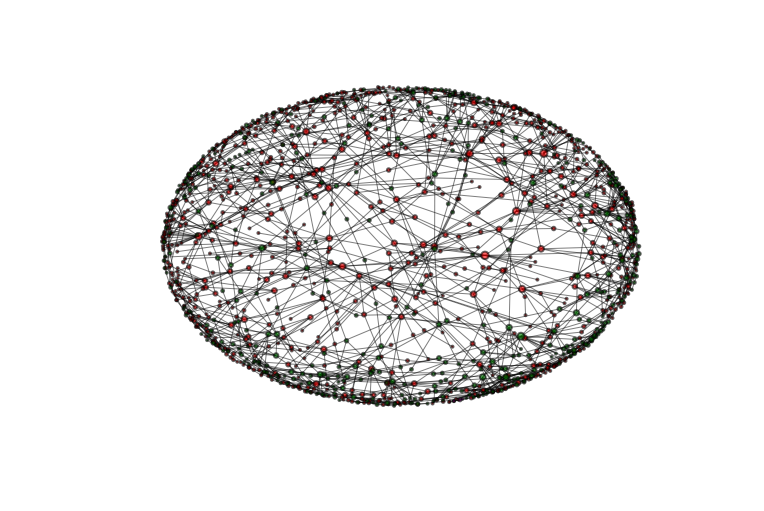

In [59]:
plot_multimode(graph,type_string='component')

In [60]:
graph.edges(data = True)

[('161079', '164092', {}),
 ('161079', '166037', {}),
 ('161078', '164091', {}),
 ('161078', '166035', {}),
 ('161075', '166041', {}),
 ('161075', '164088', {}),
 ('161074', '164086', {}),
 ('161074', '166002', {}),
 ('161077', '164090', {}),
 ('161077', '166035', {}),
 ('161076', '166035', {}),
 ('161076', '164089', {}),
 ('161071', '164083', {}),
 ('161071', '166057', {}),
 ('161070', '166013', {}),
 ('161070', '164082', {}),
 ('161073', '164085', {}),
 ('161073', '166002', {}),
 ('161072', '164084', {}),
 ('161072', '166057', {}),
 ('135030', '135009', {}),
 ('124009', '125022', {}),
 ('124008', '128001', {}),
 ('124003', '128014', {}),
 ('124003', '124004', {}),
 ('124002', '126003', {}),
 ('124001', '126001', {}),
 ('124007', '128001', {}),
 ('124006', '128002', {}),
 ('124005', '128002', {}),
 ('124004', '128014', {}),
 ('118022', '118020', {}),
 ('118022', '114011', {}),
 ('118022', '114010', {}),
 ('118023', '118020', {}),
 ('118023', '114042', {}),
 ('118023', '114020', {}),
 